# Loan Approval Prediction
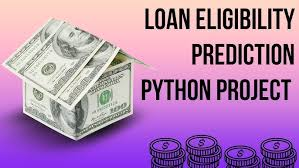!
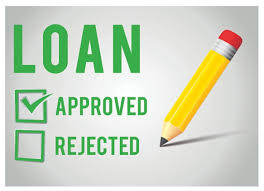
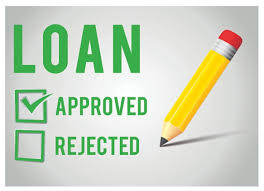
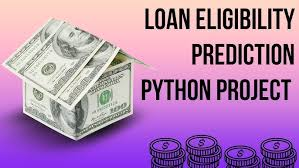

## Problem Statement
The objective of this project is to develop a machine learning model that can predict whether a loan application will be approved or not based on applicant details. Banks and financial institutions need efficient and reliable systems to make faster loan approval decisions while minimizing risk. Using historical data containing features such as applicant income, loan amount, credit history, and employment status, the project aims to classify new applications. The goal is to improve the loan approval process through automation and intelligent prediction models.

## Import Modules

In [89]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data OverView


In [90]:
# read dataset
df=pd.read_csv('/kaggle/input/loan-prediction/Loan_Status.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
# finding the dimensions
df.shape

(614, 13)

Total Rows : **614**, Total Columns : **13**

In [92]:
# Name of the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [93]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [94]:
def print_value_counts(df, columns):
    for col in columns:
        print(f"Value counts for '{col}':")
        print(df[col].value_counts(dropna=False))  # dropna=False will include NaN counts
        print("-" * 40)

In [95]:
columns_to_check = ['Gender', 'Married', 'Education','Property_Area','Loan_Status']
print_value_counts(df, columns_to_check)

Value counts for 'Gender':
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
----------------------------------------
Value counts for 'Married':
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
----------------------------------------
Value counts for 'Education':
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------
Value counts for 'Property_Area':
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
----------------------------------------
Value counts for 'Loan_Status':
Y    422
N    192
Name: Loan_Status, dtype: int64
----------------------------------------


This function takes a dataframe and a list of column names, and prints the value counts (including missing values) for each specified column in a clean format.

## Data Cleaning


In [96]:
# gives total unique values present in all the columns
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [97]:
# Matrix indicating where each entry [i][j] is True if the value is null and False otherwise.
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
# gives total count of null values in a particular column
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Let's tackle each column one by one.

In [99]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Since **'Loan_ID'** is just a unique identifier and does not contribute to the prediction, **we remove it** from the dataset.

We first tackle columns with **object (categorical)** values

In [100]:
def fill_mode(df, columns):
    for col in columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [101]:
cols_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed']
fill_mode(df, cols_to_fill)
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

This function automatically fills missing values in multiple categorical columns by replacing them with their **most frequent (mode) value.**

Now let's handle our remaining columns.

In [102]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

Since **LoanAmount is a numerical column** and might have outliers, we fill missing values **using the median** (better than mean for skewed data).

In [103]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [104]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have **successfully handled all missing (NA) values** by appropriately filling categorical columns with their mode and numerical columns with either the median or mode. The dataset is now complete and ready for further **preprocessing and model building.**

In [105]:
# Describes the statistics of our Dataset 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [106]:
# Describes schema of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


## Data Visualisation

In [107]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We are now performing **univariate analysis** to understand the distribution and behavior of individual features in the dataset.

Univariate analysis focuses on **analyzing one variable at a time**. It helps in understanding the central tendency, spread, and patterns within each feature individually. This process identifies the data distribution, detects outliers, and highlights important characteristics of each variable, which is critical for effective preprocessing and model building.

### Distribution of the loan status


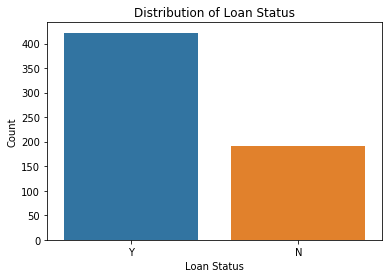

In [108]:
# Plotting the distribution of Loan_Status
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

**Conclusion:** Most loan applications are approved (Y) compared to rejections (N). 

### Distribution of Gender

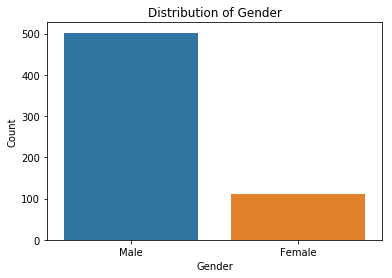

In [109]:
# Plotting the distribution of Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Conclusion:** The dataset has significantly more male applicants than female applicants.

### Distribution of the Martial Status

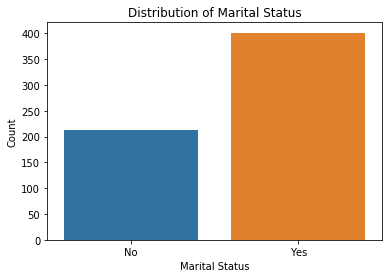

In [110]:
# Plotting the distribution of Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Married', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

**Conclusion:** Most of the loan applicants are married. The number of married applicants is almost double that of unmarried applicants.

### Distribution of the Self-employment

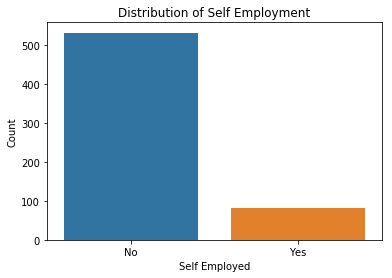

In [111]:
# Plotting the distribution of Self_Employed
plt.figure(figsize=(6,4))
sns.countplot(x='Self_Employed', data=df)
plt.title('Distribution of Self Employment')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

**Conclusion:** Most applicants are not self-employed. Only a small portion of the applicants are self-employed individuals.

### Education Distribution

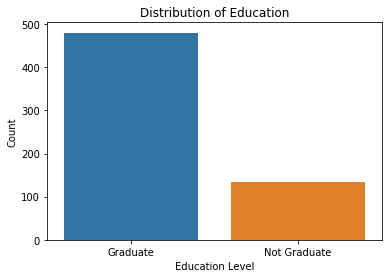

In [112]:
# Plotting the distribution of Education
plt.figure(figsize=(6,4))
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

**Conclusion:** Most applicants are graduates. The number of graduates is much higher than non-graduates among the loan applicants.

### Distribution of Applicant Income

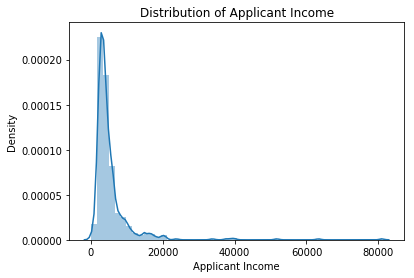

In [113]:
# Plotting the distribution of ApplicantIncome
plt.figure(figsize=(6,4))
sns.distplot(df['ApplicantIncome'], hist=True, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Density')
plt.show()

**Conclusion:** Applicant income is highly skewed to the right. Most applicants have a lower income, with a few having very high incomes.

### Distribution of Coapplicant Income

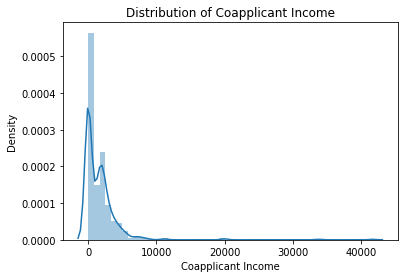

In [114]:
# Plotting the distribution of CoapplicantIncome
plt.figure(figsize=(6,4))
sns.distplot(df['CoapplicantIncome'], hist=True, kde=True)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Density')
plt.show()

**Conclusion:** The distribution of coapplicant income is highly skewed, with the majority of applicants having low or no coapplicant income. A few applicants show higher coapplicant incomes, but these instances are rare.

### Distribution of LoanAmount

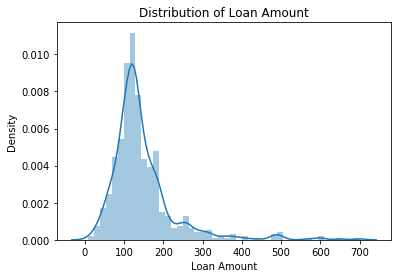

In [115]:
# Plotting the distribution of LoanAmount
plt.figure(figsize=(6,4))
sns.distplot(df['LoanAmount'], hist=True, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

**Conclusion:** The loan amount distribution is right-skewed, with most applicants requesting lower loan amounts (below 200). A few applicants request significantly higher loan amounts, but they are less common in the dataset. 

We now move to **bivariate analysis** to explore the relationship between **independent variables** and the **target variable Loan_Status.**

**Bivariate analysis** explores the relationship between two variables to identify patterns, correlations, and potential dependencies. Visualizations like scatter plots, bar plots, and heatmaps are used to understand the impact of one variable on the other, helping to uncover trends or associations that can improve model predictions. This step is crucial for feature selection and understanding key factors influencing the target variable.

### Applicant Income vs.Loan Amount


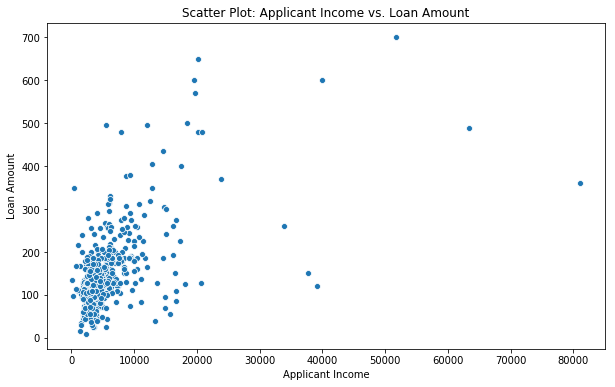

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()

**Conclusion:** The scatter plot shows a weak positive correlation between applicant income and loan amount, with most applicants requesting loan amounts around 100-200, regardless of their income. However, a few high-income applicants request larger loan amounts, indicating that higher-income individuals may occasionally request higher loans.

### Married vs. Applicant Income

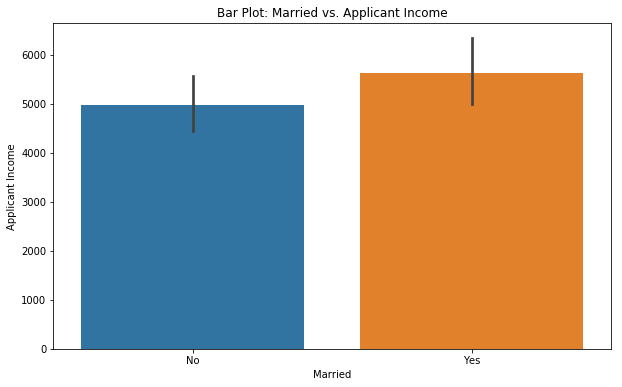

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Married', y='ApplicantIncome')
plt.xlabel('Married')
plt.ylabel('Applicant Income')
plt.title('Bar Plot: Married vs. Applicant Income')
plt.show()
     

**Conclusion:** The bar plot indicates that married applicants tend to have a slightly higher average income compared to unmarried applicants, suggesting a possible correlation between marital status and income level. The income difference, however, is not very large.

### Applicant Income vs. Education

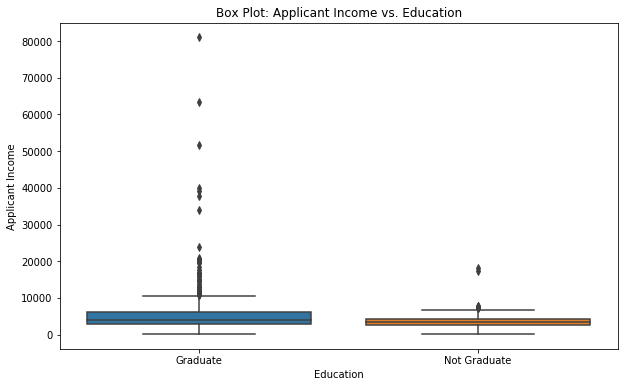

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

**Conclusion:** The box plot shows that graduates generally have higher incomes compared to non-graduates, with a wider spread of incomes and some extreme outliers among graduates. Non-graduates tend to have lower and more concentrated income levels. 

### Credit History vs. Loan Status


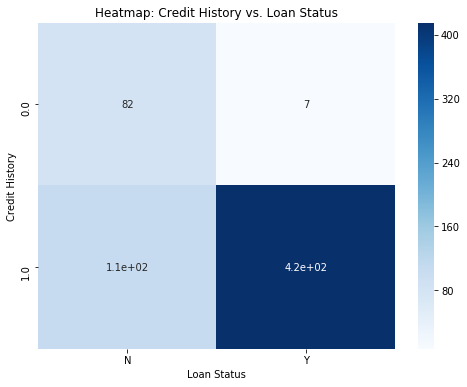

In [119]:
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')
cross_tab = pd.crosstab(df['Credit_History'], df['Loan_Status'])
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel("Credit History")
plt.title('Heatmap: Credit History vs. Loan Status')
plt.show()

**Conclusion:** The heatmap shows a strong correlation between credit history and loan approval. Applicants with a positive credit history (1) are significantly more likely to have their loan approved (Y), while those with a negative credit history (0) are much less likely to get approved.

### Gender vs Loan_Status


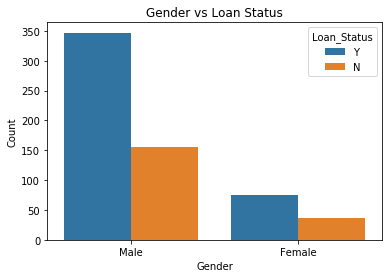

In [120]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Conclusion:** The bar plot shows that male applicants have a higher loan approval rate compared to female applicants, with significantly more male applicants being approved for loans. However, the number of rejected loans is also higher for males than females.

### Married vs Loan_Status

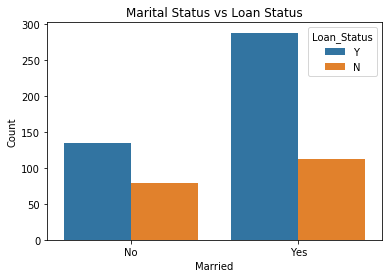

In [121]:
plt.figure(figsize=(6,4))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Marital Status vs Loan Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()


**Conclusion:** The bar plot shows that married applicants have a significantly higher loan approval rate compared to unmarried applicants, with most married applicants receiving loan approvals. In contrast, unmarried applicants have a lower approval rate, with a notable number of rejections. 

### Education vs Loan_Status

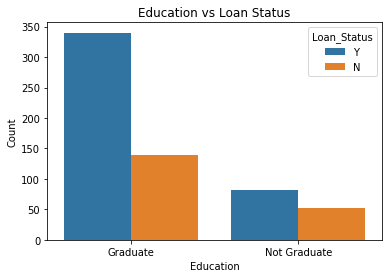

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

**Conclusion:** The bar plot shows that graduates have a significantly higher loan approval rate compared to non-graduates, with a larger proportion of graduates getting their loans approved. Non-graduates, on the other hand, have fewer approvals and a relatively higher number of rejections.

### Self_Employed vs Loan_Status

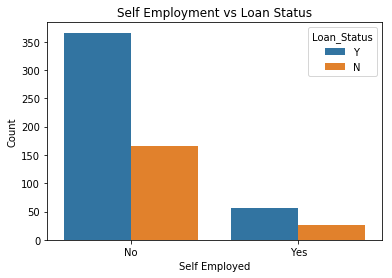

In [123]:
plt.figure(figsize=(6,4))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Self Employment vs Loan Status')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()


**Conclusion:** The bar plot indicates that non-self-employed applicants have a much higher loan approval rate compared to self-employed applicants. The number of approved loans is significantly greater for non-self-employed individuals, while self-employed individuals face more loan rejections 

### Property_Area vs Loan_Status

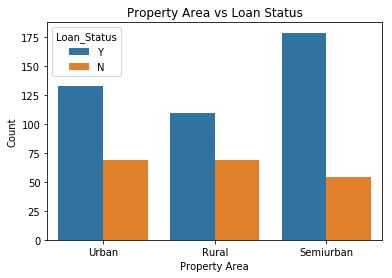

In [124]:
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


**Conclusion:** The bar plot shows that applicants from semiurban areas have the highest loan approval rate, followed by urban areas, while rural applicants have the fewest loan approvals. The number of loan rejections is higher for applicants from rural areas compared to urban and semiurban areas.

### Credit_History vs Loan_Status

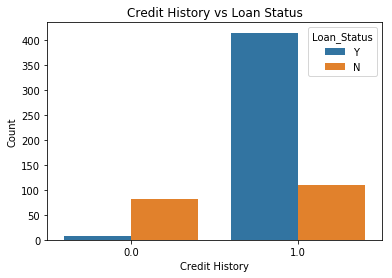

In [125]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()


**Conclusion:** The bar plot clearly shows that applicants with a positive credit history (1) have a much higher loan approval rate compared to those with a negative credit history (0). A significant proportion of loan rejections occur among applicants with no credit history or poor credit history. 

### ApplicantIncome vs Loan_Status

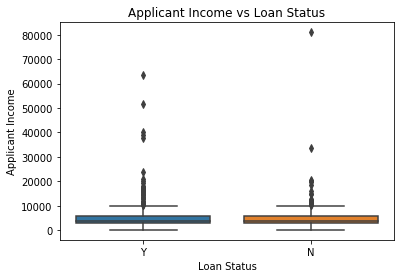

In [126]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()


**Conclusion:** The box plot shows that applicants with approved loans (Y) generally have higher incomes than those with rejected loans (N). While both groups have a similar range of income, the median income for approved applicants is higher, and there are more outliers among approved applicants with very high incomes.

### LoanAmount vs Loan_Status

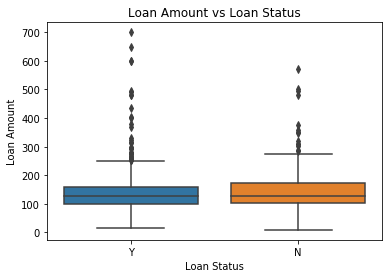

In [127]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


**Conclusion:** The box plot reveals that applicants with approved loans (Y) typically request higher loan amounts compared to those with rejected loans (N). Although the loan amounts for both groups have a similar median, approved applicants tend to request larger loans, and there are more outliers among the approved loans.

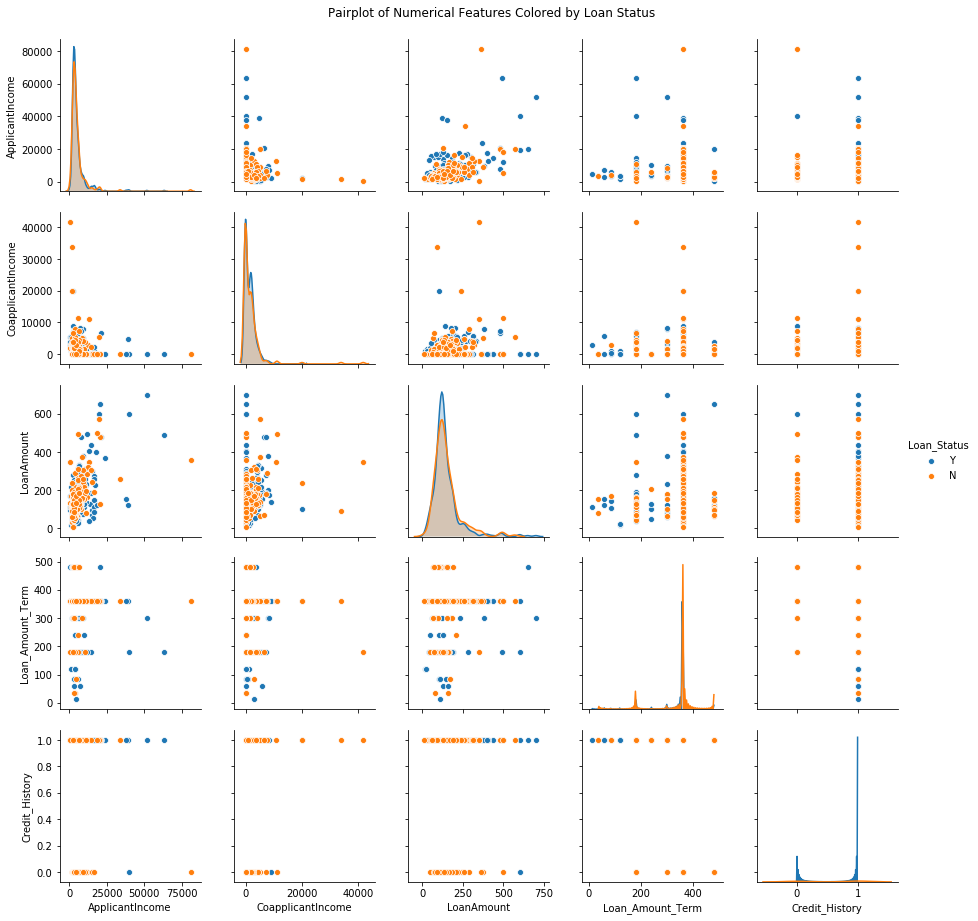

In [128]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
sns.pairplot(df[numerical_cols + ['Loan_Status']], hue='Loan_Status')
plt.suptitle('Pairplot of Numerical Features Colored by Loan Status', y=1.02)
plt.show()

## Detecting outliers and removing them

**Outliers** are data points that significantly differ from the rest of the dataset and fall outside the general distribution. They can be unusually high or low values that do not conform to the expected pattern of the data. Outliers are often identified using statistical methods, such as the interquartile range (IQR), and may indicate errors or valuable insights depending on the context.

**The “ApplicantIncome” column contains outliers** which need to be removed before moving further. 

In [129]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]


The **income of the loan co-applicant** also contains outliers.

In [130]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'])]

## Data Preparation


**Label Encoding** is a technique used to convert **categorical variables into numerical values** so that they can be used by machine learning algorithms, which typically require numerical input. It assigns a unique integer to each category in a feature, allowing the model to process categorical data effectively. This method is particularly useful for ordinal data where the categories have an inherent order.

In [131]:
# Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
for i in col_to_encode:
    df[i] = le.fit_transform(df[i])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0


**StandardScaler is a preprocessing technique** used to standardize numerical features by **scaling them to have a mean of 0 and a standard deviation of 1**. This is important for machine learning algorithms that rely on distance-based calculations, like KNN or SVM, as it ensures that all features contribute equally to the model. By transforming the data into a common scale, StandardScaler improves the performance and convergence speed of many models.

In [132]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,-2.187010,-0.844506,-2.372201,-5.482965,-1.292668,0,0
3,1,1,0,1,0,-2.187754,-0.844433,-2.374395,-5.482965,-1.292668,2,1
5,1,1,2,0,1,-2.186699,-0.844275,-2.334085,-5.482965,-1.292668,2,1
6,1,1,0,1,0,-2.187847,-0.844505,-2.381250,-5.482965,-1.292668,2,1
7,1,1,3,0,0,-2.187585,-0.844420,-2.363975,-5.482965,-9.500714,1,0


## Train Test Split

In [134]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**We divided the dataset into 70% training set and 30% test set.**

## Model Building - Logistic Regression

In [135]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")


Logistic Regression:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.85      0.99      0.91        73

   micro avg       0.86      0.86      0.86       100
   macro avg       0.89      0.75      0.79       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix:
 [[14 13]
 [ 1 72]]




## Model Building - Random Forest

In [136]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")


Random Forest Classifier:
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65        27
           1       0.87      0.89      0.88        73

   micro avg       0.82      0.82      0.82       100
   macro avg       0.77      0.76      0.77       100
weighted avg       0.82      0.82      0.82       100

Confusion Matrix:
 [[17 10]
 [ 8 65]]




## Model Building - Support Vector Classifier

In [137]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_report_svc)
print("\nConfusion Matrix: \n", confusion_matrix_svc)


SVC:
Accuracy:  0.86

Classification Report:                precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.85      0.99      0.91        73

   micro avg       0.86      0.86      0.86       100
   macro avg       0.89      0.75      0.79       100
weighted avg       0.87      0.86      0.85       100


Confusion Matrix: 
 [[14 13]
 [ 1 72]]


**The Logistic Regression model outperforms the other two models (Random Forest and SVC)** in terms of accuracy and generalization. Its simplicity and efficiency in handling linearly separable data allow it to provide better results for this loan prediction task, making it the most effective model among the three


After training our initial models — Random Forest, Logistic Regression, and Support Vector Classifier (SVC) — we observed their baseline performances. To further enhance model accuracy and ensure better generalization, we now proceed to hyperparameter tuning, aiming to find the best combination of parameters for each model

## Hyperparameter Tuning - Grid Search CV

**GridSearchCV is a hyperparameter tuning technique** used to find the optimal combination of parameters for a machine learning model. It performs an exhaustive search over a specified parameter grid, evaluating model performance using cross-validation. This process helps identify the best hyperparameters, improving model accuracy and generalization by systematically testing different parameter values. GridSearchCV is especially useful when dealing with complex models and ensures that the model is tuned to perform at its best.

In [138]:
from sklearn.model_selection import GridSearchCV
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # Only solvers that support l1 and l2
}

log_reg_grid = GridSearchCV(log_reg_model, param_grid=log_reg_params, cv=3)
log_reg_grid.fit(X_train, y_train)
log_reg_best = log_reg_grid.best_estimator_
y_pred_log_reg = log_reg_best.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression:")
print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best Cross-Validation Score: {log_reg_grid.best_score_}")
print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8354978354978355
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.85      0.99      0.91        73

   micro avg       0.86      0.86      0.86       100
   macro avg       0.89      0.75      0.79       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix:
[[14 13]
 [ 1 72]]


## ROC Curve

**The ROC (Receiver Operating Characteristic) curve** is a graphical representation of a classifier's performance, **plotting the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various thresholds.** The area under the curve (AUC) measures the model's ability to distinguish between positive and negative classes, with a higher AUC indicating better performance.

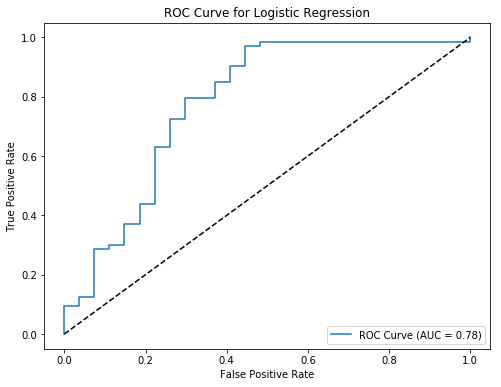

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability predictions for the positive class
y_pred_proba = log_reg_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

**Conclusion:** The ROC curve for Logistic Regression shows a good performance with an **AUC of 0.78**, indicating that the model has a decent ability to differentiate between approved and rejected loans. The curve is above the diagonal line, suggesting that the **model performs better than random guessing.**